In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Les csv fil
file_out = pd.read_csv('length_weight.csv')
trainingSet = torch.Tensor(file_out.values)
x_train = torch.reshape(torch.Tensor(trainingSet[:,0]), (-1,1))
y_train = torch.reshape(torch.Tensor(trainingSet[:,1]), (-1,1))

In [ ]:
class Model:
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def f(self,x):
        return x @ self.W + self.b

    def loss(self, x,y):
        #return(torch.mean(torch.square(self.f(x) - y)))
        return(torch.nn.functional.mse_loss(self.f(x),y))


model = Model()

In [ ]:

optimizer = torch.optim.SGD([model.W,model.b], 0.00015)
for epoch in range(500000):
    loss = model.loss(x_train, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()




W = tensor([[0.2382]], requires_grad=True), b= tensor([[-8.4981]], requires_grad=True), loss = tensor(0.9943, grad_fn=<MseLossBackward>)


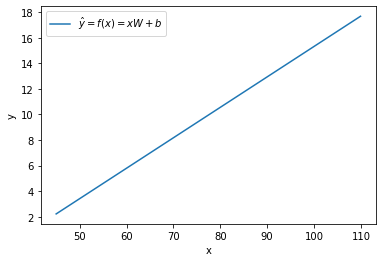

In [ ]:
print("W = %s, b= %s, loss = %s" % (model.W,model.b,loss))

#plot
plt.plot(x_train,y_train, 'o', label='$(x^{(i)}, y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()